In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Preprocessed_data.csv', index_col = 0)
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,0,1,23,0,0,0,1,0,0,...,0,1,0,0,0,0,11,5,7,0
1,1,0,1,19,0,0,0,0,1,1,...,0,3,0,0,0,0,6,6,8,0
2,0,0,1,26,1,0,0,1,1,1,...,0,2,0,0,0,0,1,4,4,0
3,0,1,1,22,0,0,0,1,1,1,...,0,1,0,0,0,1,12,4,2,0
4,0,0,1,22,0,0,0,0,1,1,...,0,1,0,0,0,0,4,6,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,0,1,1,37,0,0,0,0,0,1,...,0,4,0,0,0,0,6,4,1,1
253668,0,1,1,29,1,0,1,0,1,1,...,0,2,0,0,1,1,10,3,6,1
253670,1,1,1,25,0,0,1,0,1,0,...,0,5,15,0,1,0,13,6,4,1
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1


In [3]:
X = df.iloc[:,0:-1]
y = df.loc[:, 'Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 1)

In [4]:
accuracy_list = []
accuracy_metric_list = []
accuracy_k_list = []
precision_list = []
precision_metric_list = []
precision_k_list = []
f1_list = []
f1_metric_list = []
f1_k_list = []

In [5]:
k_value = [i for i in range(0,105)][1:30:2]
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}

## Trial 1

In [6]:
start = datetime.now()

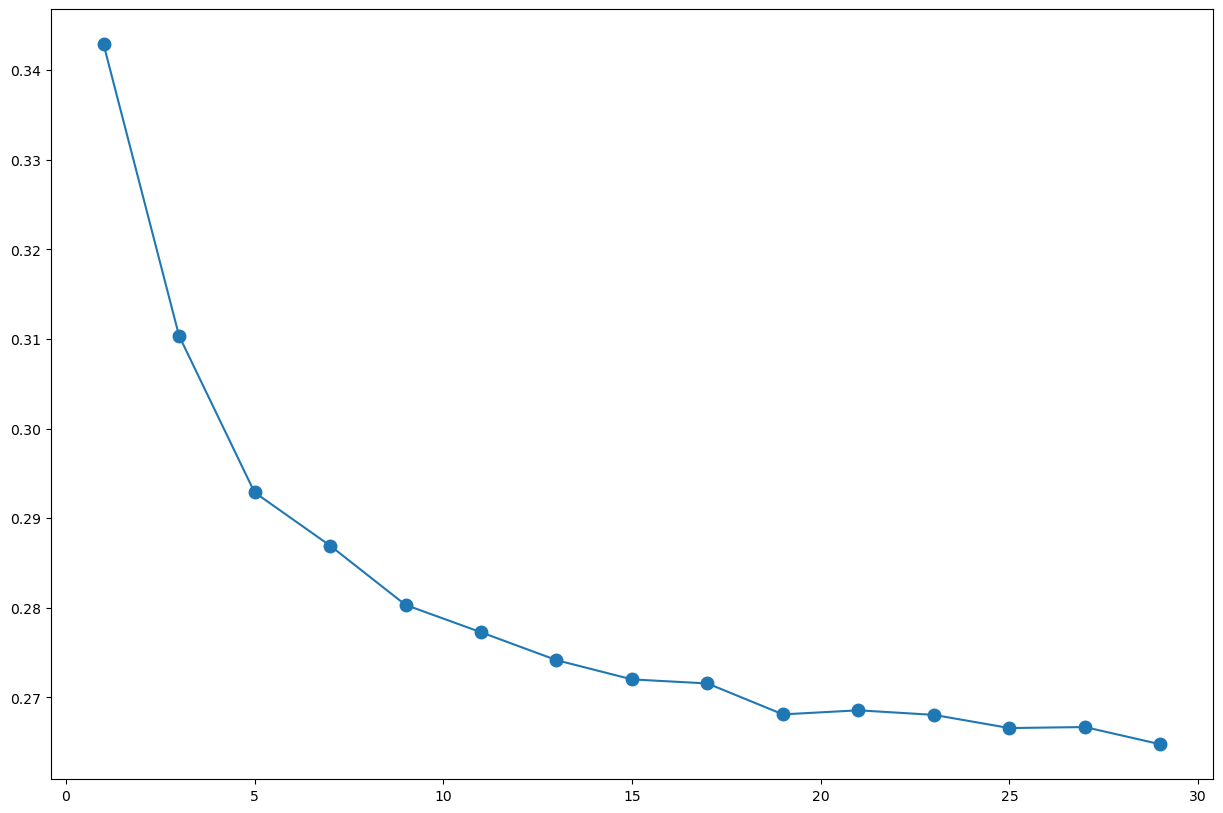

In [7]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [8]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [9]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7352458552594353


In [10]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [11]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6652836397453323


In [12]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [13]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6766589057043073


## Trial 2

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 2)

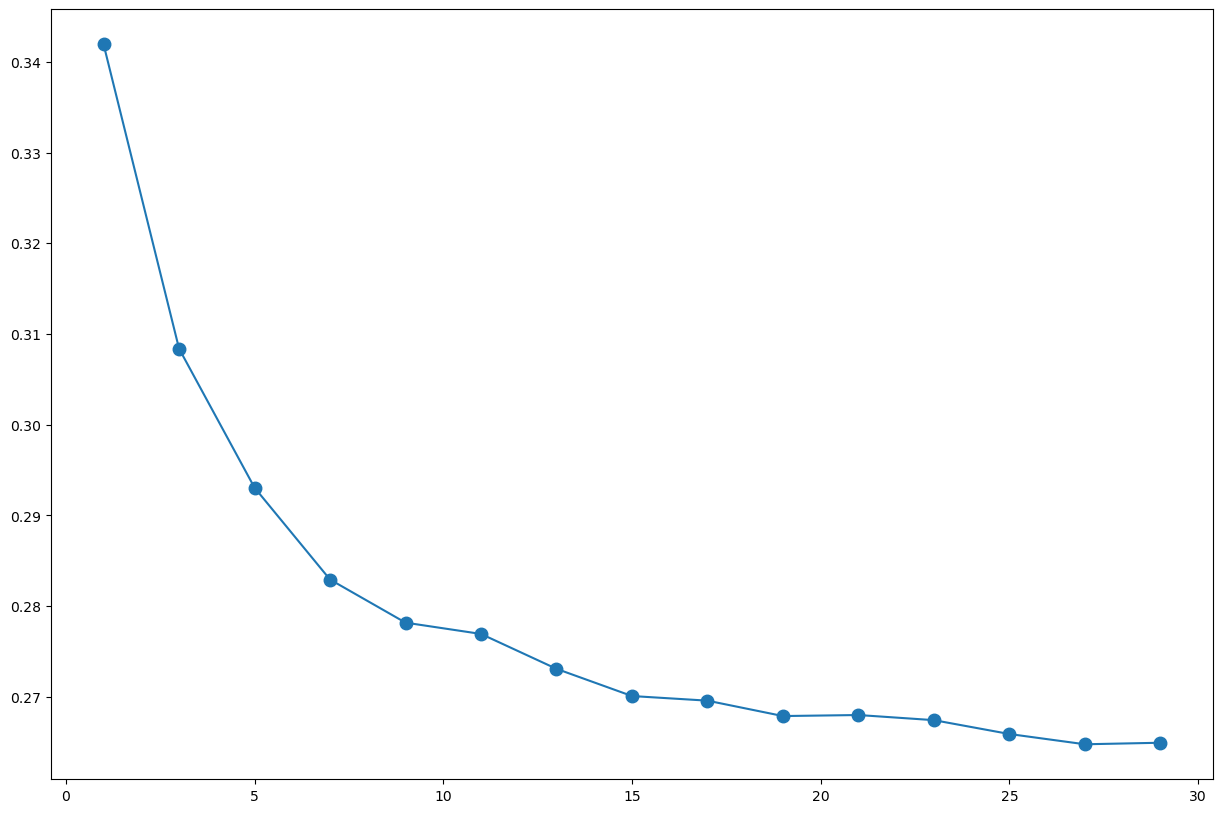

In [15]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [16]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [17]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.7352458552594353


In [18]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [19]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6617019738269106


In [20]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [21]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6705796038151137


## Trial 3

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 3)

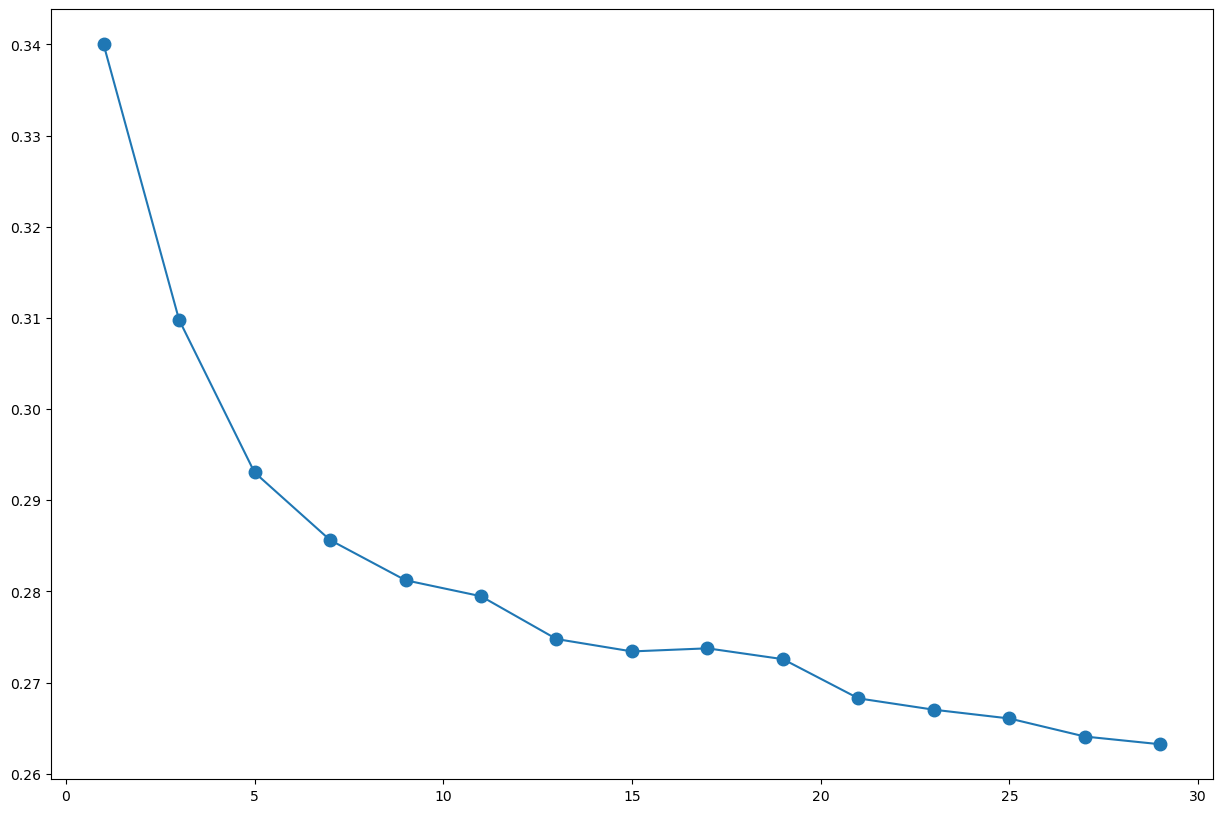

In [23]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [24]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [25]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7367736094607593


In [26]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [27]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.665708536935901


In [28]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [29]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6737454545454545


## Trial 4

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 4)

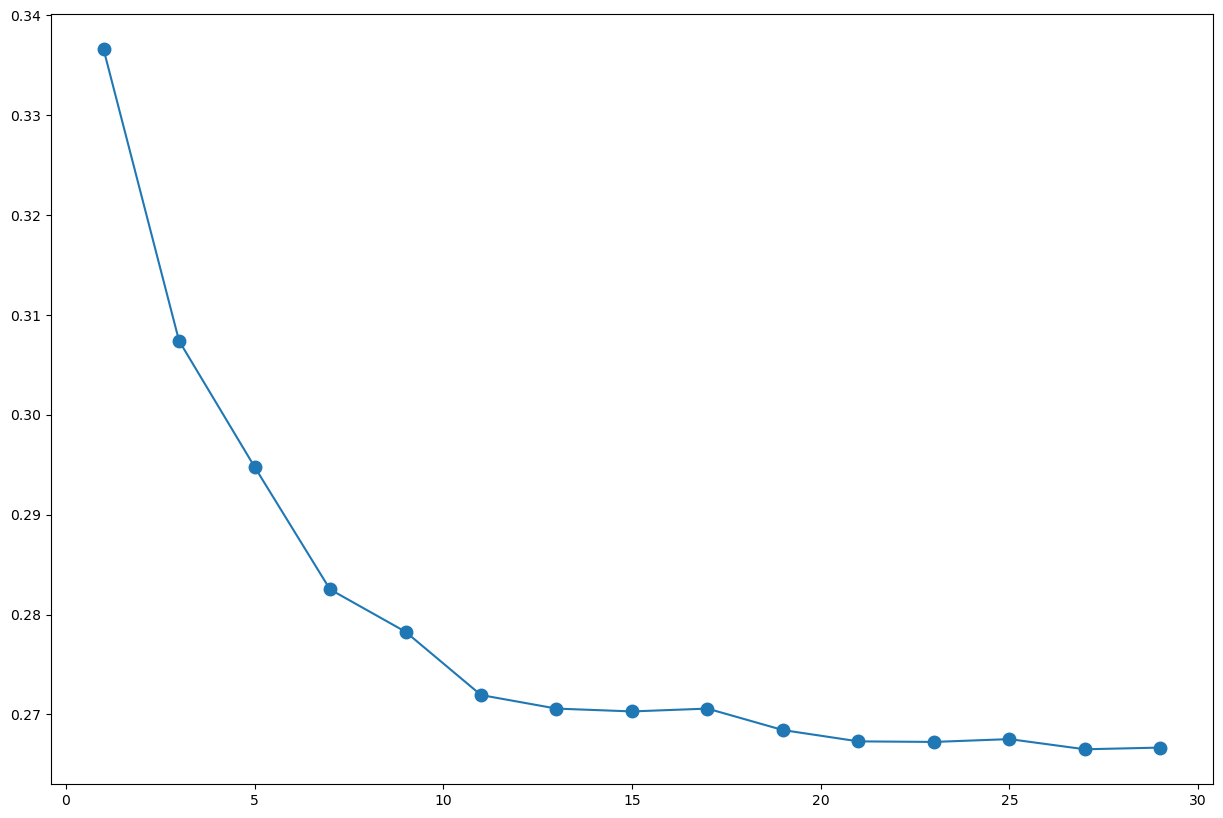

In [31]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [32]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [33]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.7334917671023595


In [34]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [35]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6622715872447152


In [36]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [37]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6669555170421722


## Trial 5

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 5)

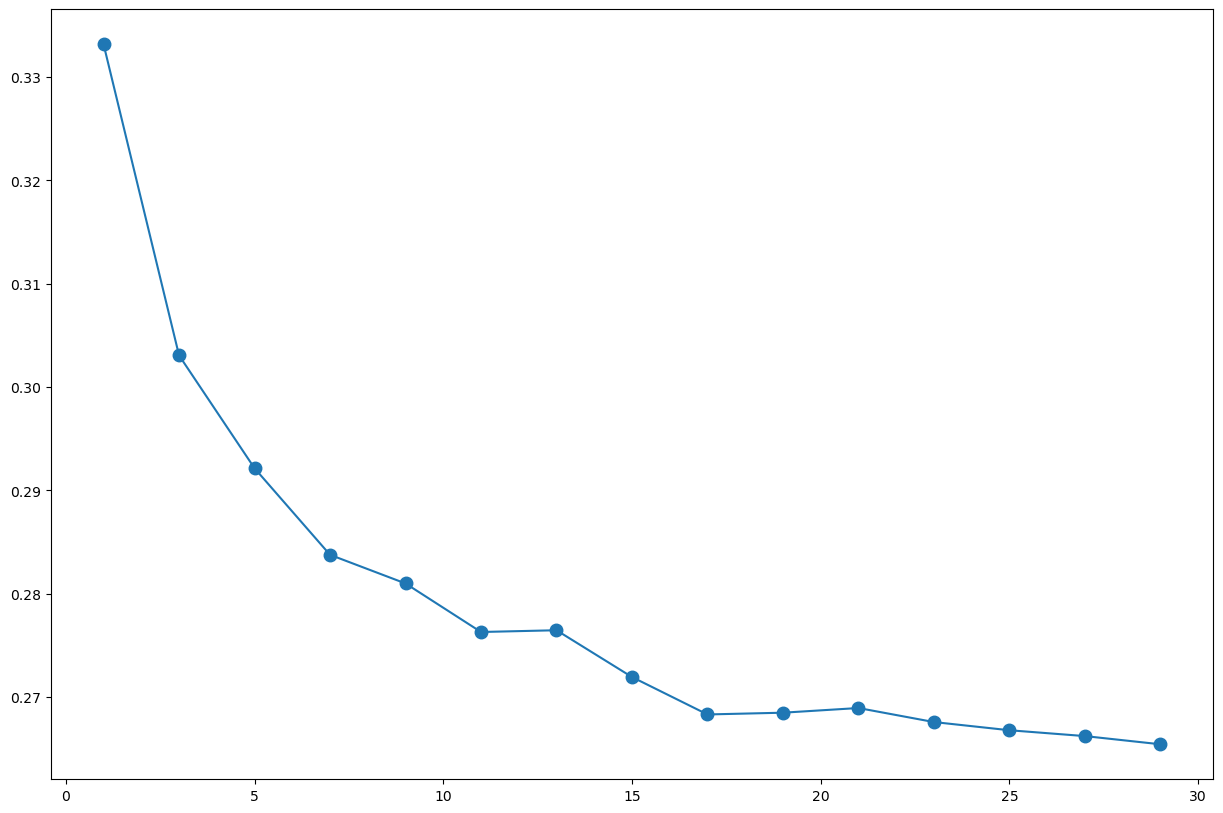

In [39]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [40]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [41]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7345668533921802


In [42]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [43]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6656688760601525


In [44]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [45]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6719424460431654


## Trial 6

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 6)

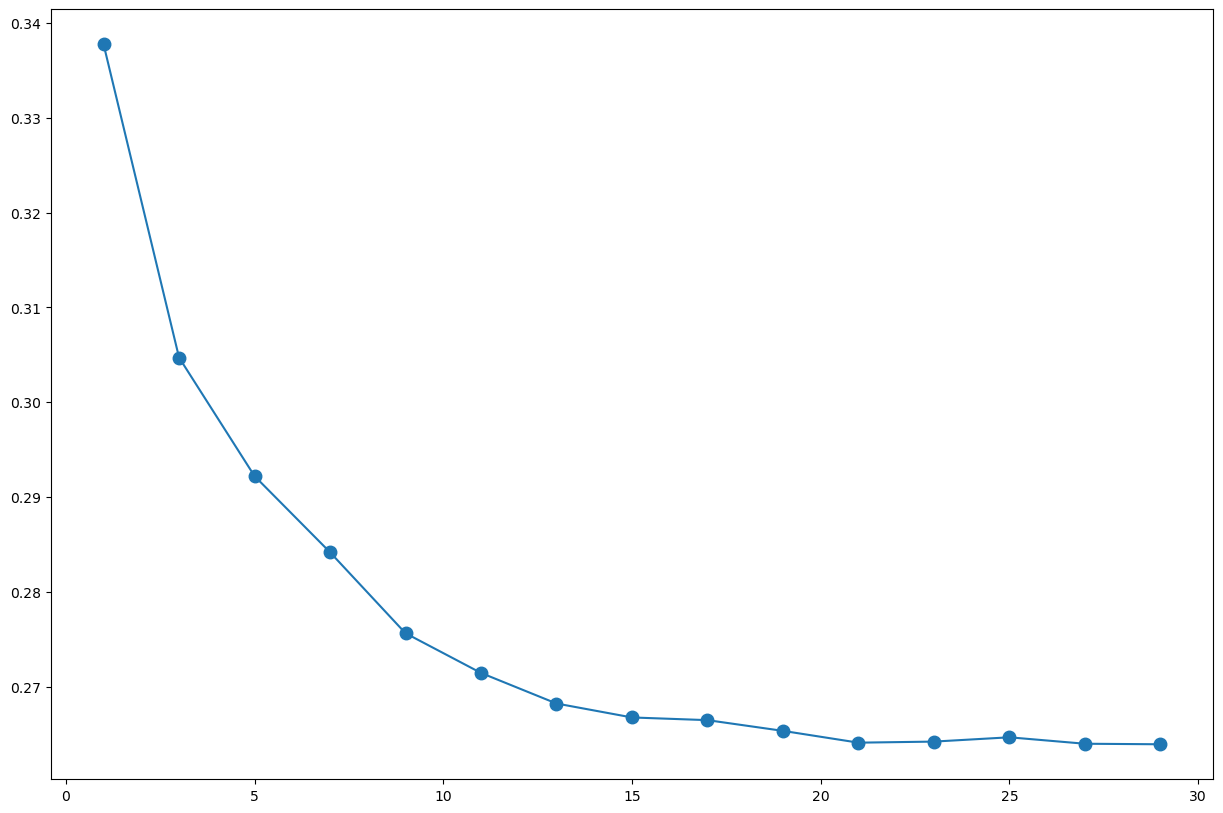

In [47]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [48]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [49]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7360946075935042


In [50]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [51]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 27): 0.66747451707178


In [52]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [53]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6691492409051848


## Trial 7

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 7)

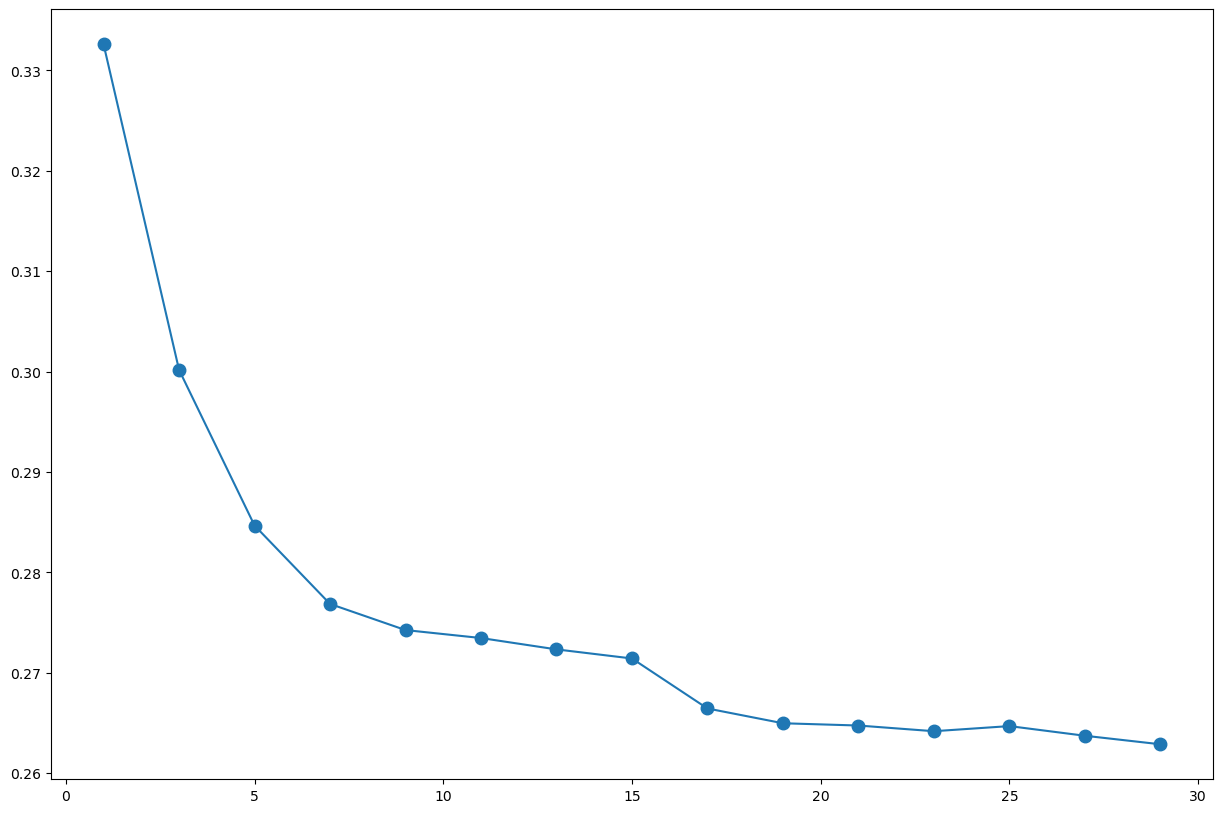

In [55]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [56]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [57]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7371131103943869


In [58]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [59]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6655629139072847


In [60]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [61]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6760748756946475


## Trial 8

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 8)

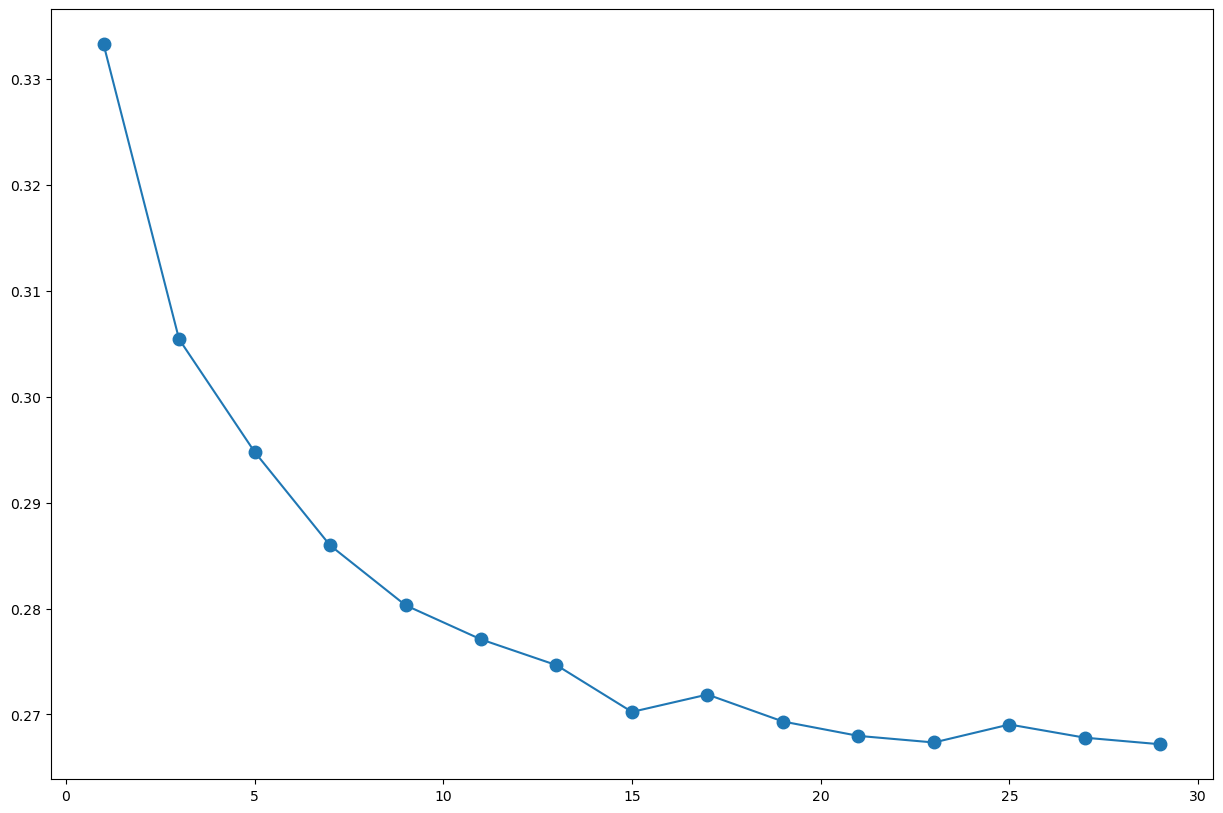

In [63]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [64]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [65]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7328127652351044


In [66]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [67]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 23): 0.6619929894842264


In [68]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [69]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6700014499057562


## Trial 9

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 9)

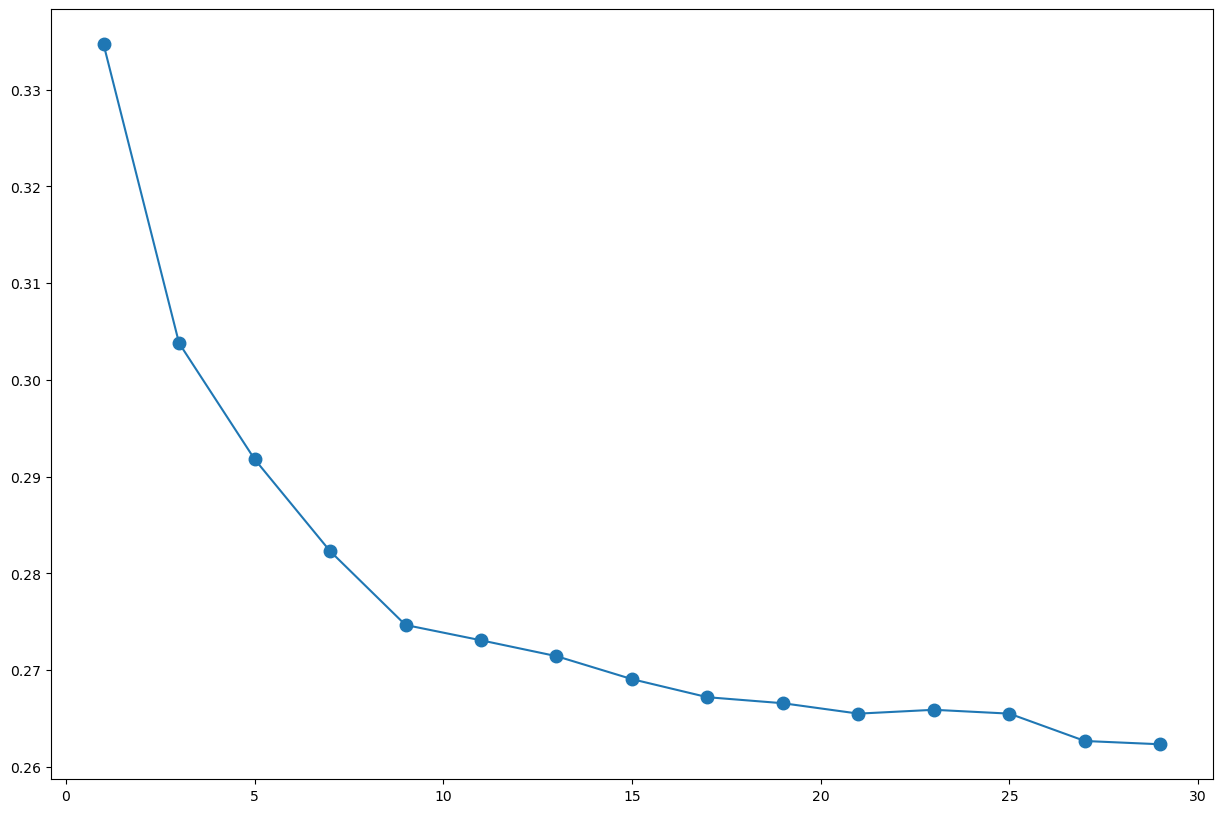

In [71]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [72]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [73]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7376789452837662


In [74]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [75]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6666187257299008


In [76]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [77]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6788599970618481


## Trial 10

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 10)

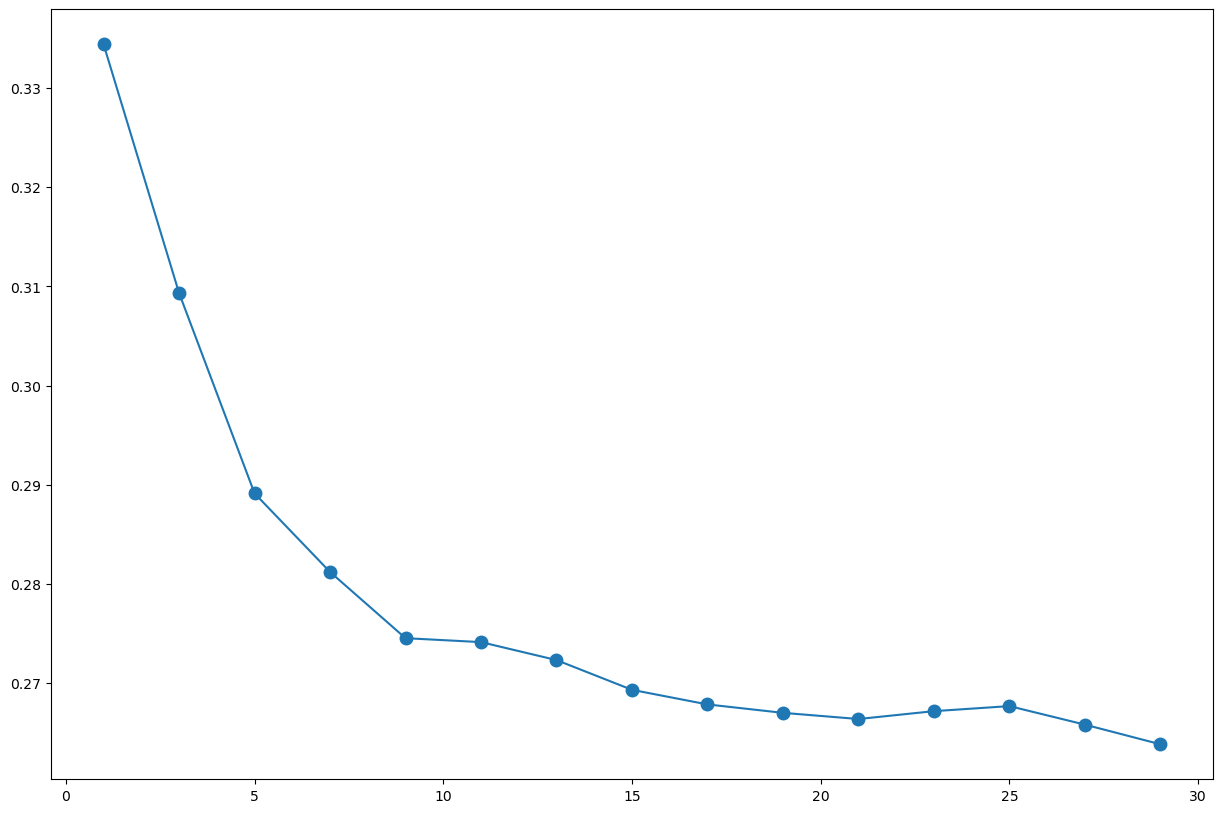

In [79]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [80]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [81]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7361511910824421


In [82]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [83]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6661416195317534


In [84]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [85]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6773442050087362


In [86]:
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

Time:  19:42:24.582144


## Results

In [87]:
data = {'Accuracy': accuracy_list, 'Accuracy K': accuracy_k_list, 'Accuracy Metric': accuracy_metric_list,
        'Precision': precision_list, 'Precision K': precision_k_list, 'Precision Metric': precision_metric_list,
        'F1_micro':f1_list, 'F1_micro K': f1_k_list, 'F1_micro Metric': f1_metric_list}

In [88]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Accuracy,Accuracy K,Accuracy Metric,Precision,Precision K,Precision Metric,F1_micro,F1_micro K,F1_micro Metric
0,0.735246,29,manhattan,0.676659,29,manhattan,0.665284,29,manhattan
1,0.735246,27,manhattan,0.670580,29,manhattan,0.661702,27,manhattan
2,0.736774,29,manhattan,0.673745,29,manhattan,0.665709,29,manhattan
3,0.733492,27,manhattan,0.666956,27,manhattan,0.662272,29,manhattan
4,0.734567,29,manhattan,0.671942,29,manhattan,0.665669,29,manhattan
5,0.736095,29,manhattan,0.669149,29,manhattan,0.667475,27,manhattan
6,0.737113,29,manhattan,0.676075,29,manhattan,0.665563,29,manhattan
7,0.732813,29,manhattan,0.670001,29,manhattan,0.661993,23,manhattan
8,0.737679,29,manhattan,0.678860,27,manhattan,0.666619,29,manhattan
9,0.736151,29,manhattan,0.677344,29,manhattan,0.666142,29,manhattan


In [89]:
trainingResults.to_csv('KNN_trainingResults.csv')

### Testing Model

In [2]:
df = pd.read_csv('Preprocessed_data.csv', index_col = 0)
trainingResults = pd.read_csv('KNN_trainingResults.csv', index_col = 0)
trainingResults

,Accuracy,Accuracy K,Accuracy Metric,Precision,Precision K,Precision Metric,F1_micro,F1_micro K,F1_micro Metric
0,0.735246,29,manhattan,0.676659,29,manhattan,0.665284,29,manhattan
1,0.735246,27,manhattan,0.670580,29,manhattan,0.661702,27,manhattan
2,0.736774,29,manhattan,0.673745,29,manhattan,0.665709,29,manhattan
3,0.733492,27,manhattan,0.666956,27,manhattan,0.662272,29,manhattan
4,0.734567,29,manhattan,0.671942,29,manhattan,0.665669,29,manhattan
5,0.736095,29,manhattan,0.669149,29,manhattan,0.667475,27,manhattan
6,0.737113,29,manhattan,0.676075,29,manhattan,0.665563,29,manhattan
7,0.732813,29,manhattan,0.670001,29,manhattan,0.661993,23,manhattan
8,0.737679,29,manhattan,0.678860,27,manhattan,0.666619,29,manhattan
9,0.736151,29,manhattan,0.677344,29,manhattan,0.666142,29,manhattan


In [3]:
X = df.iloc[:,0:-1]
y = df.loc[:, 'Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 11)

In [5]:
acc = []
f1 = []
precision = []
error_rate = []
neigh = KNeighborsClassifier(n_neighbors = 29)
parameters = {"metric":['manhattan']}
search_results =  GridSearchCV(neigh, parameters)
search_results.fit(X_train, Y_train)
Y_Predicted = search_results.predict(X_test)
acc.append(search_results.score(X_test, Y_test))
f1.append(f1_score(Y_test, Y_Predicted))
precision.append(precision_score(Y_test, Y_Predicted))
error_rate.append(np.mean(Y_Predicted != Y_test))

In [6]:
print("Accuracy: " + str(acc[0]) + '\n'
      + "Precision: " + str(precision[0]) + '\n'
      + "F1: " + str(f1[0]))

Accuracy: 0.7361511910824421
Precision: 0.6752425757130256
F1: 0.663296988952271
